# Tanzania water pumps project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Import data from csv files

First, I will import the data from csv files.

In [2]:
# First, load a chunk of the data to have a look at its format
iter_df = pd.read_csv('../Data/Training Set Values.csv',chunksize=50)
test_df = next(iter_df)
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
test_df.iloc[0]

id                                         69572
amount_tsh                                  6000
date_recorded                         2011-03-14
funder                                     Roman
gps_height                                  1390
installer                                  Roman
longitude                                34.9381
latitude                                -9.85632
wpt_name                                    none
num_private                                    0
basin                                 Lake Nyasa
subvillage                              Mnyusi B
region                                    Iringa
region_code                                   11
district_code                                  5
lga                                       Ludewa
ward                                    Mundindi
population                                   109
public_meeting                              True
recorded_by              GeoData Consultants Ltd
scheme_management   

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 40 columns):
id                       50 non-null int64
amount_tsh               50 non-null float64
date_recorded            50 non-null object
funder                   47 non-null object
gps_height               50 non-null int64
installer                47 non-null object
longitude                50 non-null float64
latitude                 50 non-null float64
wpt_name                 50 non-null object
num_private              50 non-null int64
basin                    50 non-null object
subvillage               50 non-null object
region                   50 non-null object
region_code              50 non-null int64
district_code            50 non-null int64
lga                      50 non-null object
ward                     50 non-null object
population               50 non-null int64
public_meeting           47 non-null object
recorded_by              50 non-null object
scheme_management   

From this first exploration, I can see that I can use the id as row label.
I can also parse dates for the date_recorded column.

In [5]:
X_source_df = pd.read_csv('../Data/Training Set Values.csv',index_col='id', 
                      parse_dates=['date_recorded'])
X_source_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
X_source_df.shape

(59400, 39)

In [7]:
y_source_df = pd.read_csv('../Data/Training Set Labels.csv', index_col='id')
y_source_df.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


# Exploratory Data Analysis

For exploratory data analysis, I will join the features and labels in the same dataframe.

In [8]:
source_df = X_source_df.join(y_source_df)
source_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
source_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-

In [11]:
# For the following plots, set a color for each status_group
color_dict = {'functional':'green','functional needs repair':'orange','non functional':'red'}
colors = source_df.status_group.map(color_dict)

In [12]:
# prepare columns arrays for data processing
col_to_categorize = []
col_to_drop = []

## status_group

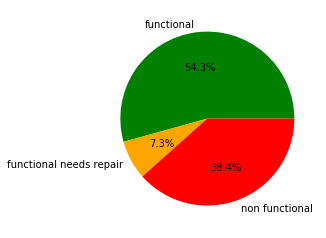

In [15]:
plot_s = source_df.status_group.value_counts().sort_index()
plt.pie(plot_s.values,labels=plot_s.index.values,colors=['green','orange','red'], autopct='%1.1f%%')
plt.show()

The labels are not balanced, there is very few functional needs repair.
This means accuracy is not a good metric, and I should use the log loss to evaluate my model.

In [16]:
# Set numeric values for the labels
labels_dict = {'functional':2,'functional needs repair':1,'non functional':0}
labels = source_df.status_group.map(labels_dict)

## amount_tsh: Amount water available to waterpoint

In [ ]:
source_df.amount_tsh.value_counts().sort_index()

Most of the values are 0.
The max seems huge, but there are other values above 100,000, so it's probably not an error.

In [53]:
def plot_num_vs_status(df,num):
    """Plot a violin plot for numerical feature"""
    # since most of the values are 0, I will remove them to have a better plot
    plot_df = df[df[num] != 0]
    plt.figure(figsize=[8,8])
    sns.violinplot(x=plot_df.status_group.values, y=plot_df[num].values)
    plt.ylabel(num)
    plt.show()
    return

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<Figure size 576x576 with 0 Axes>

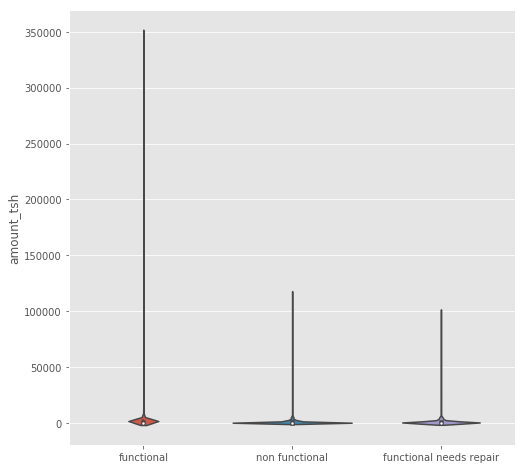

In [54]:
plot_num_vs_status(source_df,'amount_tsh')

The higher TSH values are all those of functional pumps.

**Data cleaning:** nothing to do or scale the values between 0 and 1

In [18]:
def clean_amount_tsh(df):
    pass

## date_recorded: the date the row was entered

This column has no relation with the wells, so I could get rid of it. However, I may help me to fill the missing values of the construction_year column.

In [19]:
source_df[['date_recorded','construction_year']].head(10)

,date_recorded,construction_year
id,,
69572,2011-03-14,1999
8776,2013-03-06,2010
34310,2013-02-25,2009
67743,2013-01-28,1986
19728,2011-07-13,0
9944,2011-03-13,2009
19816,2012-10-01,0
54551,2012-10-09,0
53934,2012-11-03,0


A quick look shows there is no relation between date_recorded and construction_year.

**Data cleaning:** drop this column.

In [20]:
col_to_drop.append('date_recorded')

## Funder

In [21]:
source_df.funder.value_counts().sort_index().to_csv('../Data/funder.csv', header=False)
source_df.funder.value_counts()

Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
Kkkt                        1287
World Vision                1246
Unicef                      1057
Tasaf                        877
District Council             843
Dhv                          829
Private Individual           826
Dwsp                         811
0                            777
Norad                        765
Germany Republi              610
Tcrs                         602
Ministry Of Water            590
Water                        583
Dwe                          484
Netherlands                  470
Hifab                        450
Adb                          448
Lga                          442
Amref                        425
Fini Water                   393
Oxfam                        359
Wateraid                     333
Rc Church                    321
Isf                          316
          

This column has 1897 different values, a lot of them appear only once, and there are a lot of mispelling, or same funder has different name. There is also 777 "0".
To use this column as a categorical variable, I will need to pre-process it, keeping the most frequent values and changing the less frequent as "others"

In [22]:
def clean_funder(df):
    pass

## gps_height: Altitude of the well

In [23]:
source_df.gps_height.value_counts().sort_index()

-90       1
-63       2
-59       1
-57       1
-55       1
-54       1
-53       1
-52       2
-51       2
-50       5
-49       4
-48       6
-47       8
-46       6
-45       9
-44       6
-43      11
-42      13
-41      11
-40      26
-39      14
-38      17
-37      19
-36      24
-35      18
-34      18
-33      22
-32      24
-31      26
-30      26
         ..
 2469     1
 2475     1
 2484     1
 2491     1
 2501     1
 2506     1
 2509     2
 2521     1
 2523     1
 2535     1
 2536     1
 2539     1
 2545     1
 2552     1
 2554     2
 2557     1
 2559     1
 2560     2
 2566     1
 2567     1
 2568     1
 2569     1
 2576     1
 2585     1
 2614     1
 2623     1
 2626     2
 2627     1
 2628     1
 2770     1
Name: gps_height, Length: 2428, dtype: int64

Wells with negative altitude are underground.

**Data cleaning:** nothing to do with this column.

## installer

In [24]:
source_df.installer.value_counts().sort_index().to_csv('../Data/installer.csv',header=False)
source_df.installer.value_counts()

DWE                           17402
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
LGA                             408
World vision                    408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                    270
SEMA                        

This column has 2145 different values, with the same issues as the funder column.
To use this column as a categorical variable, I will need to pre-process it, keeping the most frequent values and changing the less frequent as "others"

In [25]:
def clean_installer(df):
    pass

## longitude, latitude

In [26]:
source_df.latitude.value_counts().sort_index()

-1.164944e+01       1
-1.164838e+01       1
-1.158630e+01       1
-1.156858e+01       1
-1.156680e+01       1
-1.156451e+01       1
-1.156432e+01       1
-1.156232e+01       1
-1.156229e+01       1
-1.156162e+01       1
-1.156105e+01       1
-1.156055e+01       1
-1.155749e+01       1
-1.155728e+01       1
-1.155703e+01       1
-1.155639e+01       1
-1.155413e+01       1
-1.155317e+01       1
-1.153953e+01       1
-1.153842e+01       1
-1.153833e+01       1
-1.153785e+01       1
-1.153707e+01       1
-1.153679e+01       1
-1.152131e+01       1
-1.151494e+01       1
-1.151389e+01       1
-1.151323e+01       1
-1.151176e+01       1
-1.151079e+01       1
                 ... 
-1.021558e+00       1
-1.016317e+00       1
-1.015149e+00       1
-1.013978e+00       1
-1.013626e+00       1
-1.011835e+00       1
-1.010717e+00       1
-1.009458e+00       1
-1.008978e+00       1
-1.008346e+00       1
-1.007073e+00       1
-1.006552e+00       1
-1.006140e+00       1
-1.005107e+00       1
-1.004616e

In [27]:
source_df.longitude.value_counts().sort_index()

0.000000     1812
29.607122       1
29.607201       1
29.610321       1
29.610965       1
29.611947       1
29.612507       1
29.612763       1
29.613443       1
29.616872       1
29.618479       1
29.630583       1
29.638815       1
29.638904       1
29.639026       1
29.640156       1
29.640411       1
29.640963       1
29.641149       1
29.642162       1
29.642201       1
29.642269       1
29.642488       1
29.642861       1
29.643541       1
29.643546       1
29.643579       1
29.643938       1
29.644221       1
29.644315       1
             ... 
40.286679       1
40.287471       1
40.295239       1
40.298026       1
40.300378       1
40.301214       1
40.301987       1
40.301999       1
40.303795       1
40.304418       1
40.305421       1
40.305644       1
40.311031       1
40.311540       1
40.319699       1
40.320419       1
40.320693       1
40.320693       1
40.320693       1
40.320699       1
40.321966       1
40.322169       1
40.322625       1
40.322805       1
40.322832 

values equal to 0 or close to 0 are not valid.

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


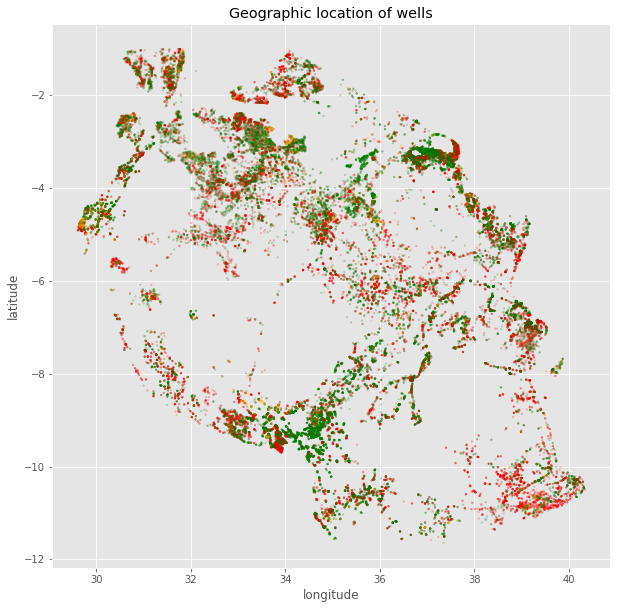

In [28]:
# plot waterpoints on a geographic map
plot_df = source_df[['latitude','longitude']]
plot_df['colors'] = colors

# remove invalid values before plotting
plot_df = plot_df[plot_df.latitude < -0.1]
plot_df = plot_df.loc[plot_df.longitude > 29]

plt.figure(figsize=[10,10])
plt.scatter(plot_df.longitude, plot_df.latitude, color=plot_df.colors, alpha=0.2, s=3)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geographic location of wells')
plt.show()

There is a lot of non functional waterpoints at the south east of Tanzania.

**Data cleaning:** replace 0 or close to 0 values with the mean of the column. This is not accurate, but it's better than 0. A more advanced treatment would be to use the mean for the same region. Tanzania is divided in 21 regions.

In [29]:
def clean_latitude_longitude(df):
    pass

## wpt_name: name of the water point

In [30]:
source_df.wpt_name.value_counts()

none                             3563
Shuleni                          1748
Zahanati                          830
Msikitini                         535
Kanisani                          323
Bombani                           271
Sokoni                            260
Ofisini                           254
School                            208
Shule Ya Msingi                   199
Shule                             152
Sekondari                         146
Muungano                          133
Mkombozi                          111
Madukani                          104
Hospital                           94
Mbugani                            94
Upendo                             93
Kituo Cha Afya                     90
Mkuyuni                            88
Umoja                              84
Center                             83
Ccm                                81
Kisimani                           78
Ofisi Ya Kijiji                    76
Mtakuja                            76
Tankini     

I already have the water point id, which is unique, so I can get rid of this column.

**Data cleaning:** drop this column.

In [31]:
col_to_drop.append('wpt_name')

## num_private

In [32]:
source_df.num_private.value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
        ...  
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, Length: 65, dtype: int64

Most of the values are 0. I think I could get rid of this column, because there is not enough data to be useful.

**Data cleaning:** drop this column.

In [33]:
col_to_drop.append('num_private')

## basin: geographic water basin

In [34]:
source_df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [35]:
# I want to plot the number of waterpoints for each basin, and their operational status
# This function will be used for other categorical features

def plot_status_vs_cat(df, cat):
    """Plot a bar of the number of waterpoints with their status for each category"""
    # First, pivot_table
    plot_sc_df = df[[cat,'status_group']]
    plot_sc_df['count_wp'] = 1
    plot_sc_df = plot_sc_df.pivot_table(index=[cat],columns=['status_group'],values=['count_wp'],aggfunc='count',fill_value=0)
    plot_sc_df.columns = plot_sc_df.columns.droplevel(0)
    plot_sc_df['nb_waterpoints'] = plot_sc_df['functional'] + plot_sc_df['functional needs repair'] + plot_sc_df['non functional']
    plot_sc_df.sort_values(by='nb_waterpoints', inplace=True)
    #print(plot_sc_df)
    # Then plot
    plt.figure(figsize=[15,10])
    plt.bar(plot_sc_df.index.values, plot_sc_df['functional'].values, color='green')
    plt.bar(plot_sc_df.index.values, plot_sc_df['functional needs repair'].values, 
            bottom=plot_sc_df['functional'].values, color='orange')
    plt.bar(plot_sc_df.index.values, plot_sc_df['non functional'].values, 
            bottom=plot_sc_df['functional'].values+plot_sc_df['functional needs repair'].values, color='red')
    plt.xlabel(cat)
    plt.ylabel('Number of waterpoints')
    plt.show()
    return

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


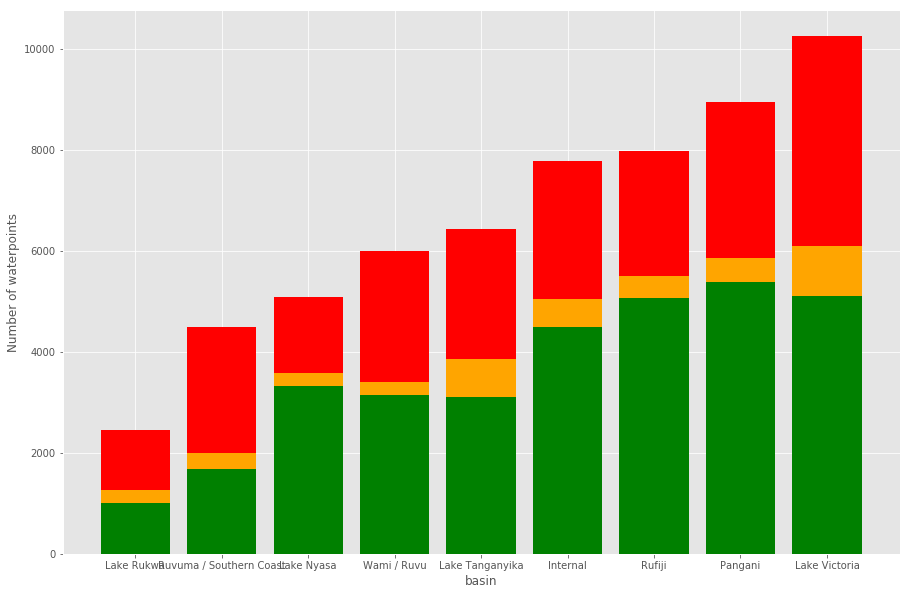

In [36]:
plot_status_vs_cat(source_df,'basin')

**Data cleaning:** change type of this column

In [37]:
col_to_categorize.append('basin')

## subvillage

In [38]:
source_df.subvillage.value_counts().sort_index().to_csv('../Data/subvillage.csv', header=False)
source_df.subvillage.value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
Mapinduzi         109
I                 109
Mjini             108
Mjimwema          108
Mkwajuni          104
Mwenge            102
Mabatini           98
Azimio             98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Lukujo              1
Nduwi B             1
Mlinga              1
Kanyinya B          1
Kwemaluli           1
Kitenga S           1
Karama              1
Gamuya              1
Mwakiponda          1
Kabaherere          1
Lutokile            1
Forest              1
Msuzu               1
Gong'Homa           1
Gurawe    

This column is very messy, with a lot of values referring only to one waterpoint. I suggest to drop this column. 

**Data cleaning:** drop this column.

In [39]:
col_to_drop.append('subvillage')

## region

In [40]:
source_df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


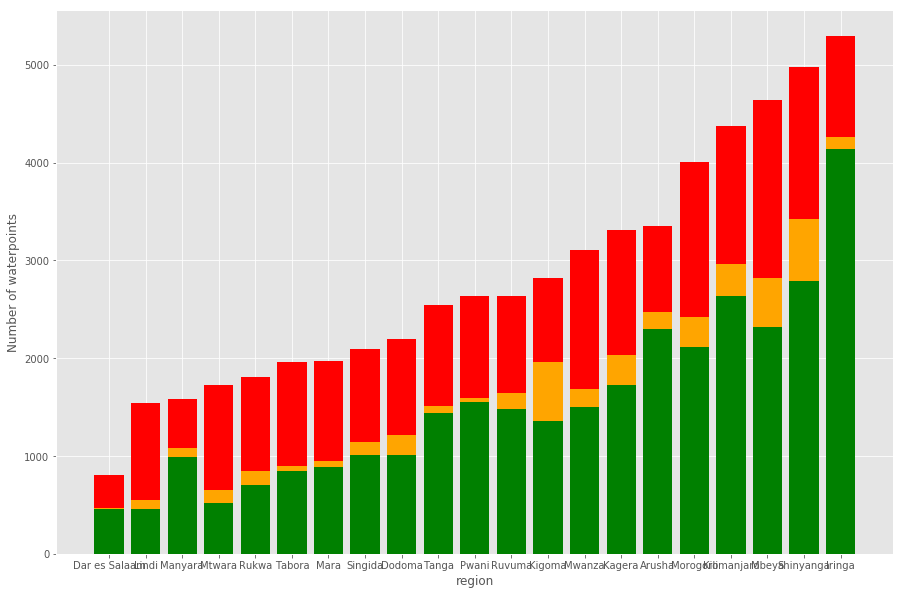

In [41]:
# I want to plot the number of waterpoints for each region, and their operational status
plot_status_vs_cat(source_df,'region')

**Data cleaning:** change type of this column

In [42]:
col_to_categorize.append('region')

## region_code

Check the relation between region code and region

In [43]:
region_df = source_df[['region','region_code']]
region_df['count_wp'] = 1
region_df.groupby(['region', 'region_code']).count()

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count_wp
region        region_code          
Arusha        2                3024
              24                326
Dar es Salaam 7                 805
Dodoma        1                2201
Iringa        11               5294
Kagera        18               3316
Kigoma        16               2816
Kilimanjaro   3                4379
Lindi         8                 300
              18                  8
              80               1238
Manyara       21               1583
Mara          20               1969
Mbeya         12               4639
Morogoro      5                4006
Mtwara        9                 390
              90                917
              99                423
Mwanza        17                 55
              19               3047
Pwani         6                1609
              40                  1
              60               1025
Rukwa         15               1808
Ruvuma        10               2640
Shinyanga     11                  6
              14                 20
              17               4956
Singida       13               2093
Tabora        14               1959
Tanga         4                2513
              5                  34

**Data cleaning: **
Some region have several region_code, and some region_code are shared between different region.
I will keep the region column and get rid of the region_code column, because I think it's easier to enter a wrong number than a wrong region name.

In [44]:
col_to_drop.append('region_code')

## district_code

In [45]:
source_df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

**Data cleaning: ** This is another geographical value. No cleaning to do with this column.

## lga: Geographic location

In [46]:
source_df.lga.value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Kigoma Rural         824
Magu                 824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
                    ... 
Ileje                231
Bahi                 224
Kisarawe             223
Temeke               215
Rorya                210
Tarime               209
Ngorongoro           201
Kiteto               193
Shinyanga Urban      191


**Data cleaning:** categorize this column.

In [47]:
col_to_categorize.append('lga')

## ward: geographic location

In [48]:
source_df.ward.value_counts().sort_index().to_csv('../Data/ward.csv', header=False)
source_df.ward.value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
Mishamo             203
Kitunda             203
Msindo              201
Chalinze            196
Maji ya Chai        190
Usuka               187
Ngarenanyuki        172
Chanika             171
Vikindu             162
Mtwango             153
Matola              145
Zinga/Ikerege       141
Maramba             139
Wanging'ombe        139
Itete               137
Magomeni            135
Kikatiti            134
Ifakara             134
Olkokola            133
Maposeni            130
Igongolo            129
Mvomero             129
Mlangali            125
Nkoma               122
Mahongole           121
                   ... 
Igogo                 1
Thawi                 1
Kihangimahuka         1
Kirongo               1
Izia                  1
Chinugulu             1
Linda                 1
Mwanga Kaskazini      1
Kapilula              1
Korongoni             1
Mkumbi          

**Data cleaning: **This can be used as a categorical data, but first, I need to group the less frequent values.

In [49]:
def clean_ward(df):
    pass

## population: Population around the well

In [50]:
source_df.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [61]:
source_df.population.value_counts().sort_index()[:1]

0    21381
Name: population, dtype: int64

There is a lot of 0 in this column, it's a lot of missing data.

In [60]:
source_df.population.value_counts().sort_index()[-10:]

8500     1
8600     1
8848     1
9000     3
9500     1
9865     1
10000    3
11463    1
15300    1
30500    1
Name: population, dtype: int64

The maximum value seems very large compared to the others, but it may be a big waterpoint serving a big city.

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


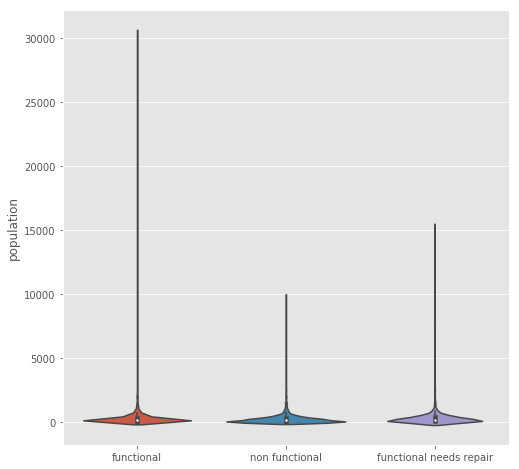

In [62]:
plot_num_vs_status(source_df,'population')

**Data cleaning: ** Replace 0 with the mean of the values and scale it

In [63]:
def clean_population(df):
    pass

## public_meeting

In [64]:
source_df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [65]:
def plot_pie(df,col):# prepare values to plot pie chart True and pie chart False
    """Plot 2 pie charts for a True/False column"""
    plotT_s = df[df[col] == True]['status_group'].value_counts().sort_index()
    plotF_s = df[df[col] == False]['status_group'].value_counts().sort_index()

    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.pie(plotT_s.values,labels=plotT_s.index.values,colors=['green','orange','red'], autopct='%1.1f%%')
    plt.title(col + ' True')

    plt.subplot(1,2,2)
    plt.pie(plotF_s.values,labels=plotF_s.index.values,colors=['green','orange','red'], autopct='%1.1f%%')
    plt.title(col + ' False')

    plt.show()

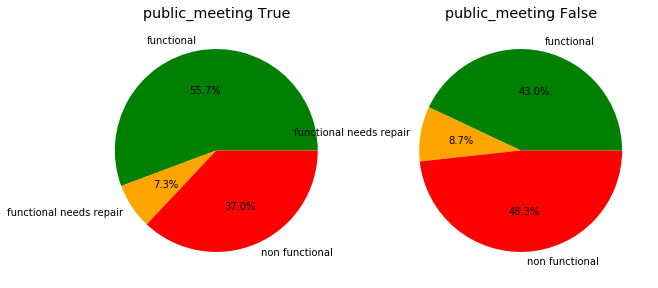

In [66]:
plot_pie(source_df,'public_meeting')

**Data cleaning: **There are NaN values. I will replace them with False.

In [67]:
def clean_public_meeting(df):
    pass

## recorded_by

In [68]:
source_df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

**Data cleaning: **This column has only one value, so I can remove it.

In [69]:
col_to_drop.append('recorded_by')

## scheme_management: who operates the waterpoint

In [70]:
source_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


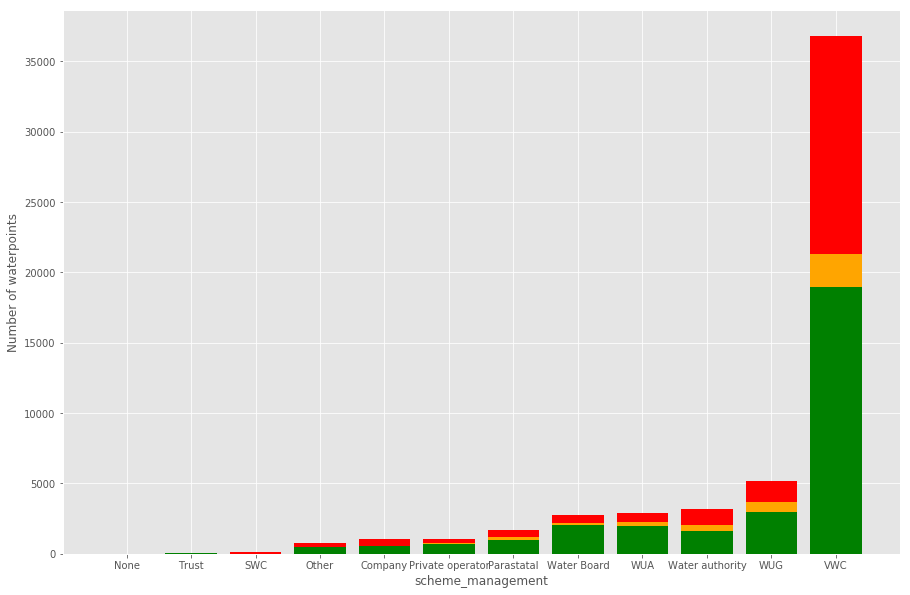

In [71]:
plot_status_vs_cat(source_df,'scheme_management')

**Data cleaning: **This is a good categorical column. There are NaN and None values. I will fill them with "Other".

In [72]:
def clean_scheme_management(df):
    pass

## scheme_name: who operates the waterpoint

In [73]:
source_df.scheme_name.value_counts().sort_index().to_csv('../Data/scheme_name.csv', header=False)
source_df.scheme_name.value_counts()

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Handeni Trunk Main(H                     152
Losaa-Kia water supply                   152
mtwango water supply scheme              152
Mkongoro T

**Data cleaning: **This column has half of the values missing, and is very messy. I will drop it.

In [74]:
col_to_drop.append('scheme_name')

## permit: if the waterpoint is permitted

In [75]:
source_df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

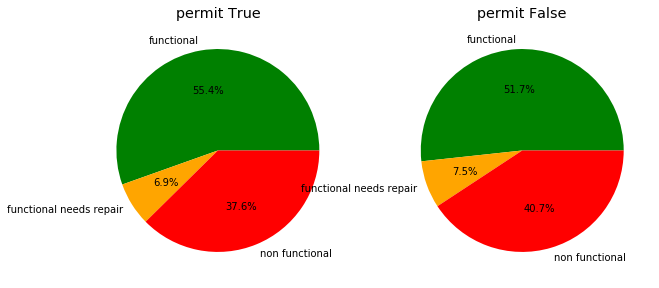

In [76]:
plot_pie(source_df,'permit')

**Data cleaning: **I will fill the NaN values with False

In [77]:
def clean_permit(df):
    pass

## construction_year

In [78]:
source_df.construction_year.describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [80]:
source_df.construction_year.value_counts()[:1]

0    20709
Name: construction_year, dtype: int64

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


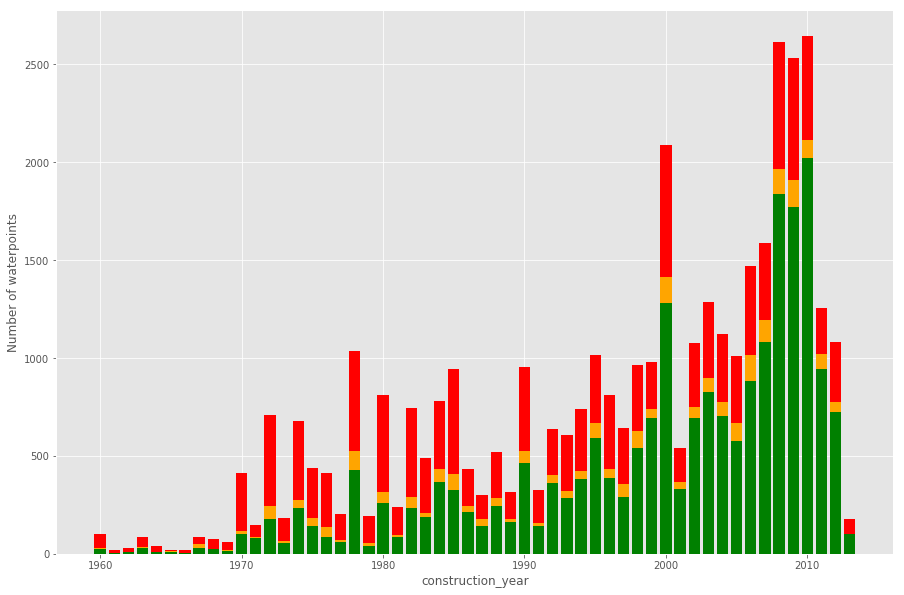

In [81]:
plot_df = source_df[source_df.construction_year != 0]
plot_status_vs_cat(plot_df,'construction_year')

It seems older waterpoints are more likely to be non functional.

**Data cleaning: **There is a lot of missing data in this column. I will replace the 0 with the mean

In [82]:
def clean_construction_year(df):
    pass

## extraction_type, extraction_type_group, extraction_type_class

In [83]:
source_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [84]:
source_df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [85]:
source_df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

**Data cleaning: **These are categorical values. They are subgroups of one another, so they are redundant. I will keep the extraction_type_group, categorize it, and drop the other columns.

In [86]:
col_to_categorize.append('extraction_type_group')
col_to_drop.append(['extraction_type_class','extraction_type'])

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


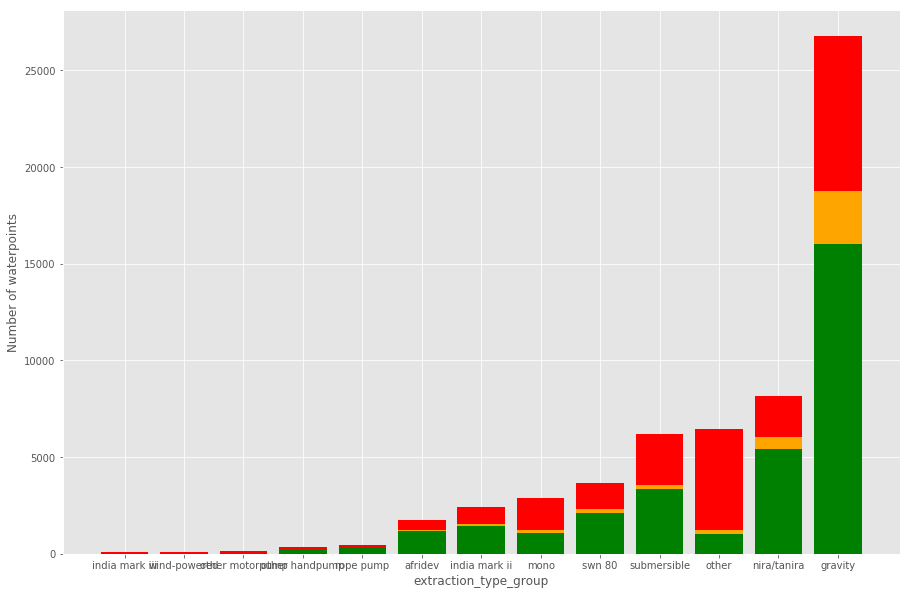

In [92]:
plot_status_vs_cat(source_df,'extraction_type_group')

## management, management_group

In [88]:
source_df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [89]:
source_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

**Data cleaning: **These are categorical values. One is the sub group of the other, so they are redundant. I will keep the management_group, categorize it, and drop the management.

In [90]:
col_to_categorize.append('management_group')
col_to_drop.append('management')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


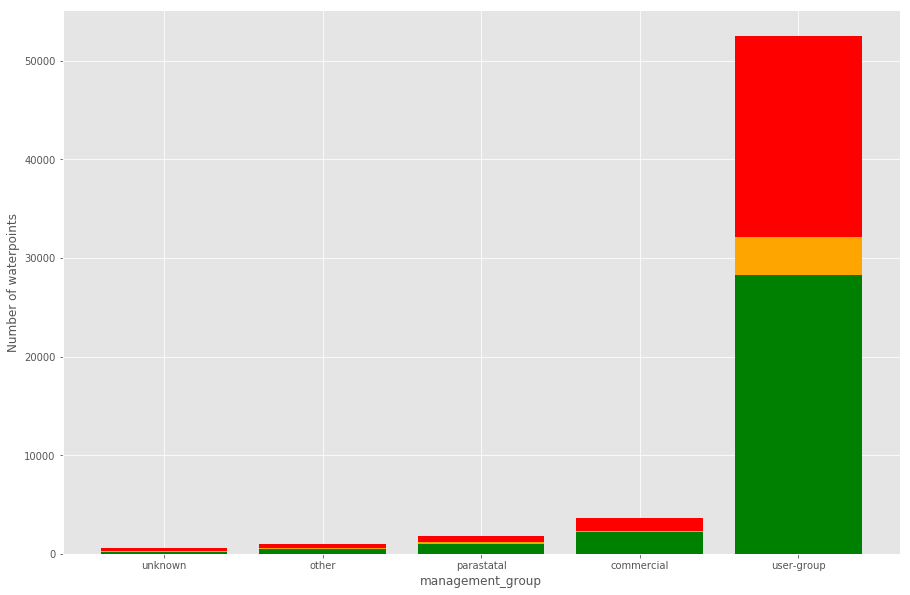

In [93]:
plot_status_vs_cat(source_df,'management_group')

## payment, payment_type

In [94]:
source_df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [95]:
source_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

**Data cleaning: **These columns are identical, I can drop one of them.

In [96]:
col_to_drop.append('payment_type')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


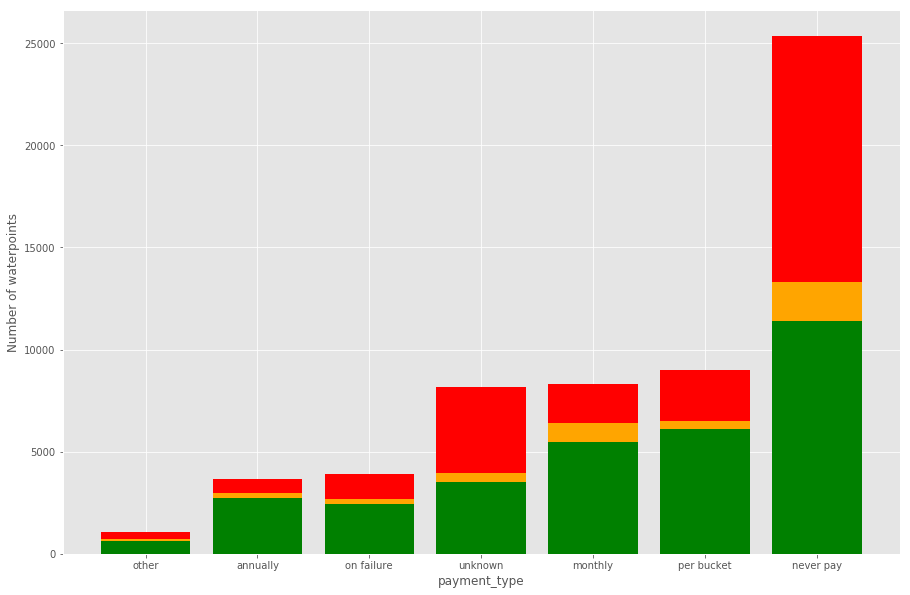

In [97]:
plot_status_vs_cat(source_df,'payment_type')

It seems that when there is payment for the water (either periodically, per bucket or on failure) the waterpoint is more likely to be functional.

## water_quality, quality_group

In [98]:
source_df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [99]:
source_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

**Data cleaning: **These are categorical values. One is the sub group of the other, so they are redundant.I will keep the quality_group, categorize it, and drop the water_quality.

In [100]:
col_to_drop.append('water_quality')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


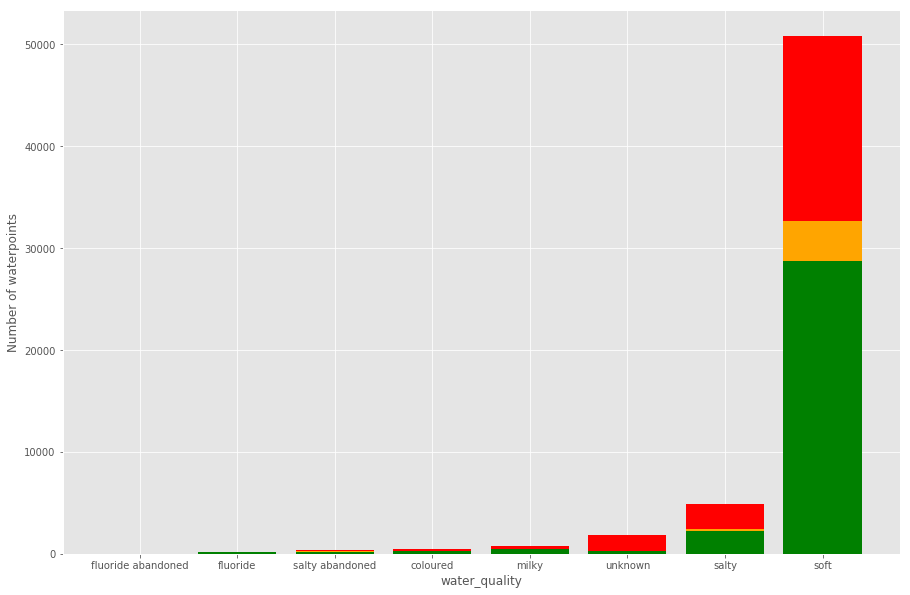

In [101]:
plot_status_vs_cat(source_df,'water_quality')

## quantity, quantity_group

In [102]:
source_df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [103]:
source_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

**Data cleaning: **These columns are identical, I can drop one of them.

In [104]:
col_to_drop.append('quantity_group')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


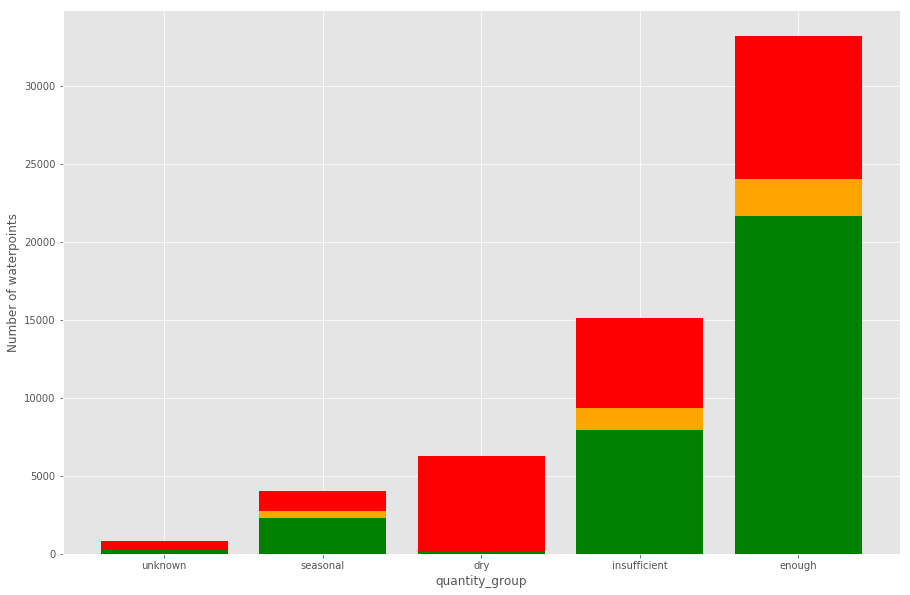

In [105]:
plot_status_vs_cat(source_df,'quantity_group')

Unsurprisingly, the waterpoint is much more likely to be non functional when the quantity is dry.

## source, source_type, source_class

In [106]:
source_df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [107]:
source_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [108]:
source_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

**Data cleaning: **These are categorical values. They are subgroups of one another, so they are redundant. I will keep source_type, categorize it and drop the other columns.

In [109]:
col_to_categorize.append('source_type')
col_to_drop.append(['source','source_class'])

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


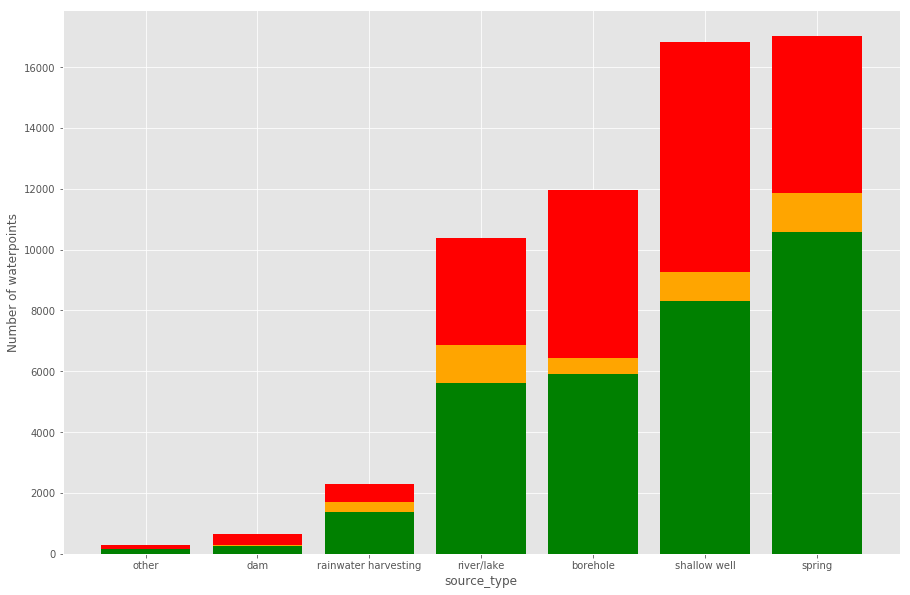

In [110]:
plot_status_vs_cat(source_df,'source_type')

Shallow well and borehole are more likely to be non functional.

## waterpoint_type, waterpoint_type_group

In [111]:
source_df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [112]:
source_df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

**Data cleaning: **These columns are redundant, with communal standpipe being divided into 2 categories in the waterpoint_type column. I can drop one of them.
I keep waterpoint_type_group, categorize it, and drop waterpoint_type.

In [113]:
col_to_categorize.append('waterpoint_type_group')
col_to_drop.append('waterpoint_type')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


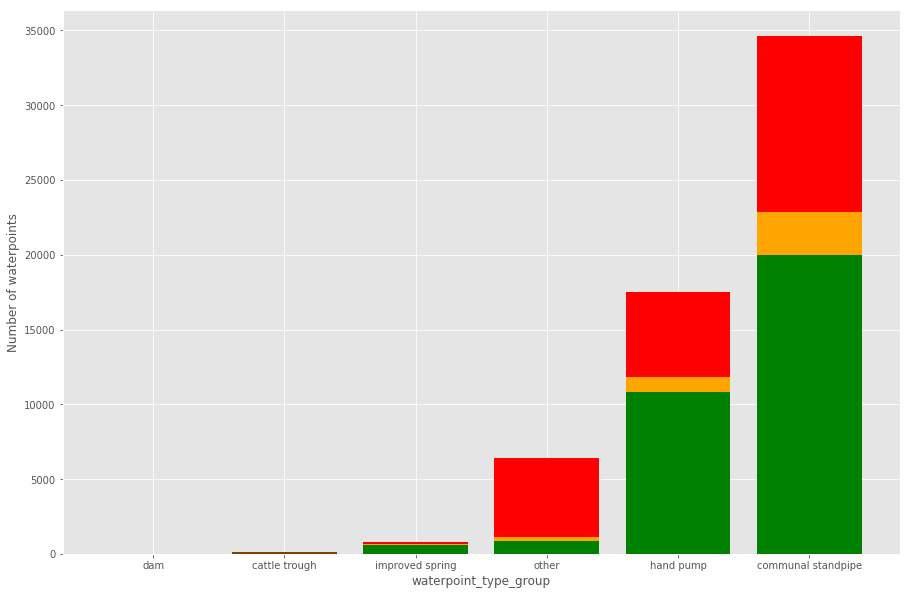

In [114]:
plot_status_vs_cat(source_df,'waterpoint_type_group')

In [ ]:
## Keep for later

# df.drop(columns = col_to_drop)
# categorize with label encoding or with dummies

#funder_map = pd.read_csv('Data/funder map.csv', header=None, index_col=0)
#df.funder.fillna('Unknown', inplace=True)
#funder_dict = funder_map.T.to_dict('records')
#df.funder = df.funder.map(funder_dict[0])